In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import matplotlib.image as mpimg
from shapely.geometry import Point, LineString
import osmnx as ox

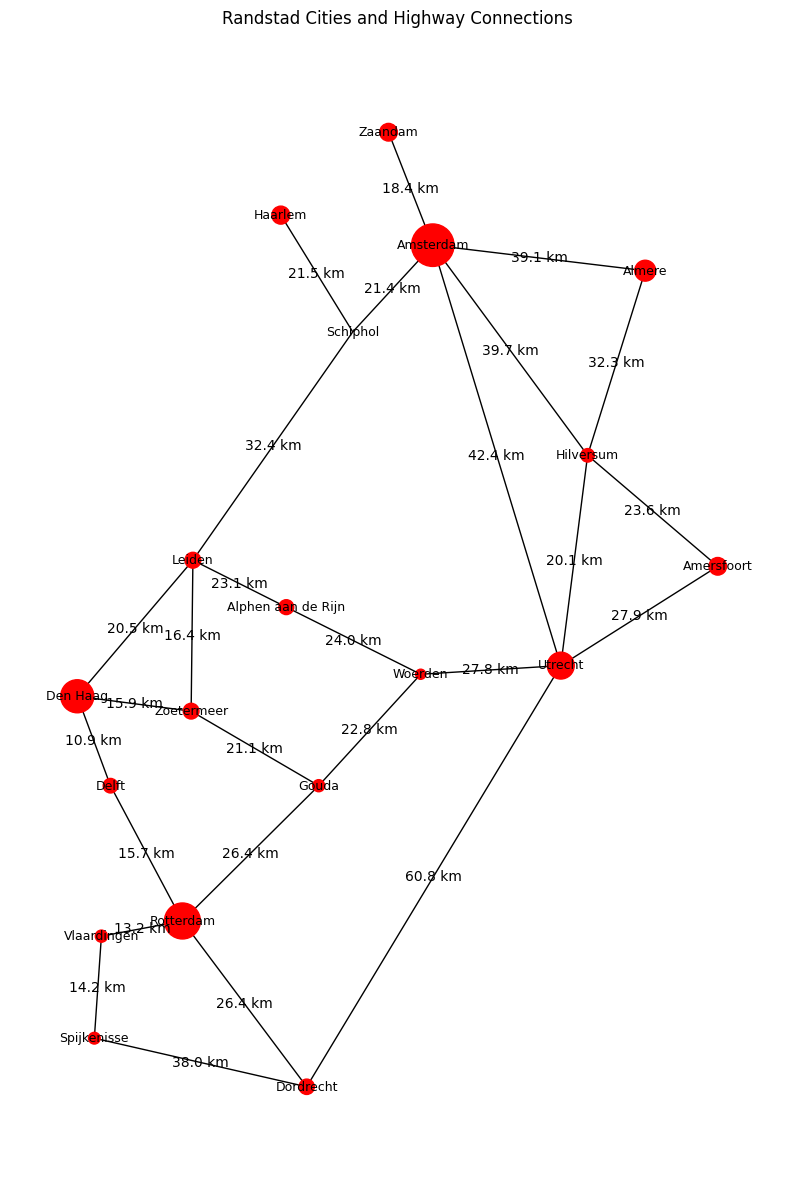

In [4]:
# Your cities and their geographical coordinates
cities_coords = {
    "Zaandam": (52.442, 4.829),
    "Amsterdam": (52.3676, 4.9041),
    "Haarlem": (52.3874, 4.6462),
    "Schiphol": (52.3105, 4.7683),
    "Leiden": (52.1601, 4.4970),
    "Den Haag": (52.0705, 4.3007),
    "Zoetermeer": (52.0607, 4.4940),
    "Delft": (52.0116, 4.3571),
    "Rotterdam": (51.9225, 4.4792),
    "Spijkenisse": (51.8453, 4.3297),
    "Dordrecht": (51.8133, 4.6901),
    "Vlaardingen": (51.9125, 4.3417),
    "Alphen aan de Rijn": (52.1292, 4.6555),
    "Gouda": (52.0116, 4.7105),
    "Woerden": (52.0850, 4.8836),
    "Utrecht": (52.0907, 5.1214),
    "Hilversum": (52.2292, 5.1669),
    "Almere": (52.3508, 5.2647),
    "Amersfoort": (52.1561, 5.3878),
}
connections = [
    (42.4, "Amsterdam", "Utrecht"),
    (32.4, "Leiden", "Schiphol"),
    (20.5, "Den Haag", "Leiden"),
    (21.1, "Gouda", "Zoetermeer"),
    (22.8, "Woerden", "Gouda"),
    (27.8, "Utrecht", "Woerden"),
    (10.9, "Den Haag", "Delft"),
    (18.4, "Amsterdam", "Zaandam"),
    (39.1, "Amsterdam", "Almere"),
    (39.7, "Amsterdam", "Hilversum"),
    (21.4, "Amsterdam", "Schiphol"),
    (32.3, "Almere", "Hilversum"),
    (23.6, "Amersfoort", "Hilversum"),
    (20.1, "Hilversum", "Utrecht"),
    (27.9, "Amersfoort", "Utrecht"),
    (21.5, "Haarlem", "Schiphol"),
    (23.1, "Leiden", "Alphen aan de Rijn"),
    (16.4, "Leiden", "Zoetermeer"),
    (24.0, "Woerden", "Alphen aan de Rijn"),
    (15.9, "Zoetermeer", "Den Haag"),
    (15.7, "Delft", "Rotterdam"),
    (26.4, "Rotterdam", "Gouda"),
    (13.2, "Rotterdam", "Vlaardingen"),
    (26.4, "Rotterdam", "Dordrecht"),
    (14.2, "Vlaardingen", "Spijkenisse"),
    (38.0, "Spijkenisse", "Dordrecht"),
    (60.8, "Dordrecht", "Utrecht"),
]
cities_population = {
    "Zaandam": 161429,
    "Amsterdam": 934927,
    "Haarlem": 167763,
    "Schiphol": 1,
    "Leiden": 130181,
    "Den Haag": 565701,
    "Zoetermeer": 128424,
    "Delft": 109573,
    "Rotterdam": 671125,
    "Spijkenisse": 71390,
    "Dordrecht": 122089,
    "Vlaardingen": 76472,
    "Alphen aan de Rijn": 114968,
    "Gouda": 75763,
    "Woerden": 53237,
    "Utrecht": 374411,
    "Hilversum": 94426,
    "Almere": 226630,
    "Amersfoort": 160747
}
# Create a networkx graph
G = nx.Graph()

# Add nodes to the graph
for city, (lat, lon) in cities_coords.items():
    population = cities_population.get(city, 0)  # Default to 0 if not found
    G.add_node(city, pos=(lon, lat), population=population, weight=population)
# Add edges to the graph
for distance, city1, city2 in connections:
    G.add_edge(city1, city2, weight=distance)

# Load the PNG image
#img = mpimg.imread('/path/to/your/SnelwegenNederland_2008.png')  # Update the path to the image

# Get positions for cities to use for layout
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
fig, ax = plt.subplots(figsize=(10, 15))
#ax.imshow(img, extent=[3.2, 7.4, 50.7, 53.7])  # You might need to adjust the extent to fit your image
node_sizes = [G.nodes[city]['population'] / 1000 for city in G.nodes]
# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='red', ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)

# Annotate the edges with distances
for (city1, city2, data) in G.edges(data=True):
    edge_midpoint = [(pos[city1][0] + pos[city2][0]) / 2, (pos[city1][1] + pos[city2][1]) / 2]
    ax.text(edge_midpoint[0], edge_midpoint[1], f"{data['weight']} km", size=10, ha='center', va='center')

# Set the title and remove the axis
ax.set_title('Randstad Cities and Highway Connections')
plt.axis('off')  # Turn off the axis
plt.show()

In [5]:
dsp = nx.shortest_path(G, source='Amsterdam', target='Delft')
print(dsp)

['Amsterdam', 'Utrecht', 'Dordrecht', 'Rotterdam', 'Delft']


In [6]:
closeness_centrality = nx.closeness_centrality(G, distance='weight')
sorted_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)

# Print the sorted closeness centrality values
for city, centrality in sorted_closeness:
    print(f"{city}: {centrality}")

Leiden: 0.017860686644175432
Gouda: 0.01722488038277512
Zoetermeer: 0.01712817584927205
Woerden: 0.016709988860007425
Den Haag: 0.016672841793256763
Utrecht: 0.015836705965159247
Schiphol: 0.015781167806417678
Delft: 0.015669887699138157
Rotterdam: 0.015600624024960999
Alphen aan de Rijn: 0.015105740181268883
Amsterdam: 0.014567821301392038
Hilversum: 0.013626040878122634
Vlaardingen: 0.013315579227696404
Dordrecht: 0.01315597134921795
Haarlem: 0.011951397649558462
Amersfoort: 0.011733263802881169
Zaandam: 0.011624903125807285
Spijkenisse: 0.01157556270096463
Almere: 0.01095290251916758


In [7]:
betweenness = nx.betweenness_centrality(G,k=None,normalized=False)
betweenness
sorted_betweenness = sorted(betweenness.items(), key=lambda item: item[1], reverse=True)

# Print the sorted closeness centrality values
for city, centrality in sorted_betweenness:
    print(f"{city}: {centrality}")

Utrecht: 53.8
Amsterdam: 44.23333333333333
Schiphol: 33.4
Dordrecht: 31.95
Rotterdam: 28.28333333333333
Leiden: 28.100000000000005
Woerden: 20.316666666666666
Gouda: 16.2
Den Haag: 9.083333333333332
Zoetermeer: 7.7
Hilversum: 7.7
Delft: 7.2
Alphen aan de Rijn: 4.2
Spijkenisse: 4.0
Vlaardingen: 2.833333333333333
Zaandam: 0.0
Haarlem: 0.0
Almere: 0.0
Amersfoort: 0.0


In [8]:

edge_betweenness_weigthed = nx.edge_betweenness_centrality(G, 
                                                             k=None, 
                                                             normalized=True, 
                                                             weight='weight', 
                                                             seed=None)
edge_betweenness_weigthed


{('Zaandam', 'Amsterdam'): 0.10526315789473684,
 ('Amsterdam', 'Utrecht'): 0.04678362573099415,
 ('Amsterdam', 'Almere'): 0.04678362573099415,
 ('Amsterdam', 'Hilversum'): 0.05263157894736842,
 ('Amsterdam', 'Schiphol'): 0.2046783625730994,
 ('Haarlem', 'Schiphol'): 0.10526315789473684,
 ('Schiphol', 'Leiden'): 0.2631578947368421,
 ('Leiden', 'Den Haag'): 0.21052631578947367,
 ('Leiden', 'Alphen aan de Rijn'): 0.09941520467836257,
 ('Leiden', 'Zoetermeer'): 0.07017543859649122,
 ('Den Haag', 'Delft'): 0.22807017543859648,
 ('Den Haag', 'Zoetermeer'): 0.06432748538011696,
 ('Zoetermeer', 'Gouda'): 0.08771929824561403,
 ('Delft', 'Rotterdam'): 0.22807017543859648,
 ('Rotterdam', 'Gouda'): 0.12280701754385964,
 ('Rotterdam', 'Vlaardingen'): 0.1695906432748538,
 ('Rotterdam', 'Dordrecht'): 0.06432748538011696,
 ('Spijkenisse', 'Vlaardingen'): 0.07602339181286549,
 ('Spijkenisse', 'Dordrecht'): 0.029239766081871343,
 ('Dordrecht', 'Utrecht'): 0.05847953216374269,
 ('Alphen aan de Rijn', 'Wo

In [9]:
# Calculate the total population of all cities
total_population = sum(cities_population.values())

# Calculate the betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, weight='weight')

# Normalize the population for each city and multiply it by the betweenness centrality
weighted_betweenness = {city: (cities_population[city] / total_population) * betweenness_centrality[city] for city in G.nodes}

# Sort the cities based on the calculated weighted betweenness centrality
sorted_weighted_betweenness = sorted(weighted_betweenness.items(), key=lambda item: item[1], reverse=True)

# Print the cities and their weighted betweenness centrality values
for city, value in sorted_weighted_betweenness:
    print(f"{city}: {value}")


Amsterdam: 0.043243195590133635
Rotterdam: 0.042423461056587515
Den Haag: 0.029654095831730263
Utrecht: 0.01847214806899793
Leiden: 0.009232605058130477
Delft: 0.005068081968322353
Gouda: 0.0028034139371268937
Woerden: 0.0022982138035623615
Zoetermeer: 0.0019799992050956285
Hilversum: 0.0018925779170752177
Vlaardingen: 0.0014148243245381508
Alphen aan de Rijn: 0.0008862695002936921
Dordrecht: 0.0007529312992927184
Schiphol: 6.16706909953164e-08
Zaandam: 0.0
Haarlem: 0.0
Spijkenisse: 0.0
Almere: 0.0
Amersfoort: 0.0


In [10]:
degree = nx.degree_centrality(G)
degree
sorted_degree = sorted(degree.items(), key=lambda item: item[1], reverse=True)

# Print the sorted closeness centrality values
for city, centrality in sorted_degree:
    print(f"{city}: {centrality}")


Amsterdam: 0.2777777777777778
Utrecht: 0.2777777777777778
Leiden: 0.2222222222222222
Rotterdam: 0.2222222222222222
Hilversum: 0.2222222222222222
Schiphol: 0.16666666666666666
Den Haag: 0.16666666666666666
Zoetermeer: 0.16666666666666666
Dordrecht: 0.16666666666666666
Gouda: 0.16666666666666666
Woerden: 0.16666666666666666
Delft: 0.1111111111111111
Spijkenisse: 0.1111111111111111
Vlaardingen: 0.1111111111111111
Alphen aan de Rijn: 0.1111111111111111
Almere: 0.1111111111111111
Amersfoort: 0.1111111111111111
Zaandam: 0.05555555555555555
Haarlem: 0.05555555555555555


In [11]:
all_shortest_paths = dict(nx.all_pairs_dijkstra_path(G))
for city, shortest_paths in all_shortest_paths.items():
    print(f"Shortest paths from node {city}:")
    for target_node, path in shortest_paths.items():
        if city != target_node:
            distance = nx.dijkstra_path_length(G, city, target_node)
            print(f"  To node {target_node}: Path = {path}, Distance = {distance}")


Shortest paths from node Zaandam:
  To node Amsterdam: Path = ['Zaandam', 'Amsterdam'], Distance = 18.4
  To node Utrecht: Path = ['Zaandam', 'Amsterdam', 'Utrecht'], Distance = 60.8
  To node Almere: Path = ['Zaandam', 'Amsterdam', 'Almere'], Distance = 57.5
  To node Hilversum: Path = ['Zaandam', 'Amsterdam', 'Hilversum'], Distance = 58.1
  To node Schiphol: Path = ['Zaandam', 'Amsterdam', 'Schiphol'], Distance = 39.8
  To node Leiden: Path = ['Zaandam', 'Amsterdam', 'Schiphol', 'Leiden'], Distance = 72.19999999999999
  To node Haarlem: Path = ['Zaandam', 'Amsterdam', 'Schiphol', 'Haarlem'], Distance = 61.3
  To node Amersfoort: Path = ['Zaandam', 'Amsterdam', 'Hilversum', 'Amersfoort'], Distance = 81.7
  To node Woerden: Path = ['Zaandam', 'Amsterdam', 'Utrecht', 'Woerden'], Distance = 88.6
  To node Dordrecht: Path = ['Zaandam', 'Amsterdam', 'Utrecht', 'Dordrecht'], Distance = 121.6
  To node Den Haag: Path = ['Zaandam', 'Amsterdam', 'Schiphol', 'Leiden', 'Den Haag'], Distance = 92

In [12]:
sum_weighted_paths = {city: 0 for city in G.nodes}
for city, shortest_paths in all_shortest_paths.items():
    sum_for_city = 0
    for target_node, path in shortest_paths.items():
        if city != target_node:
            distance = nx.dijkstra_path_length(G, city, target_node)
            weighted_distance = distance * G.nodes[target_node]['population']
            sum_for_city += weighted_distance
    sum_weighted_paths[city] = sum_for_city

# Sort the dictionary by values in descending order
sorted_sum_weighted_paths = dict(sorted(sum_weighted_paths.items(), key=lambda item: item[1]))

# Flag to track if the first city is encountered
first_city_encountered = True

# Print the sorted results in a column
for city, sum_weighted_path in sorted_sum_weighted_paths.items():
    if first_city_encountered:
        print(f"{city}: {sum_weighted_path} (City of Choice)")
        first_city_encountered = False
    else:
        print(f"{city}: {sum_weighted_path}")
    

Leiden: 221108935.89999998 (City of Choice)
Schiphol: 231336855.9
Den Haag: 232271062.6
Amsterdam: 233910238.89999998
Zoetermeer: 236750414.5
Utrecht: 245015315.4
Woerden: 248625372.20000005
Gouda: 250746721.4
Delft: 251175028.5
Rotterdam: 261959761.40000004
Alphen aan de Rijn: 278599796.40000004
Hilversum: 284378495.6
Dordrecht: 303404989.0
Zaandam: 305971980.5
Vlaardingen: 314014396.99999994
Haarlem: 315267072.4
Amersfoort: 337638296.7
Almere: 341566255.59999996
Spijkenisse: 365460565.8


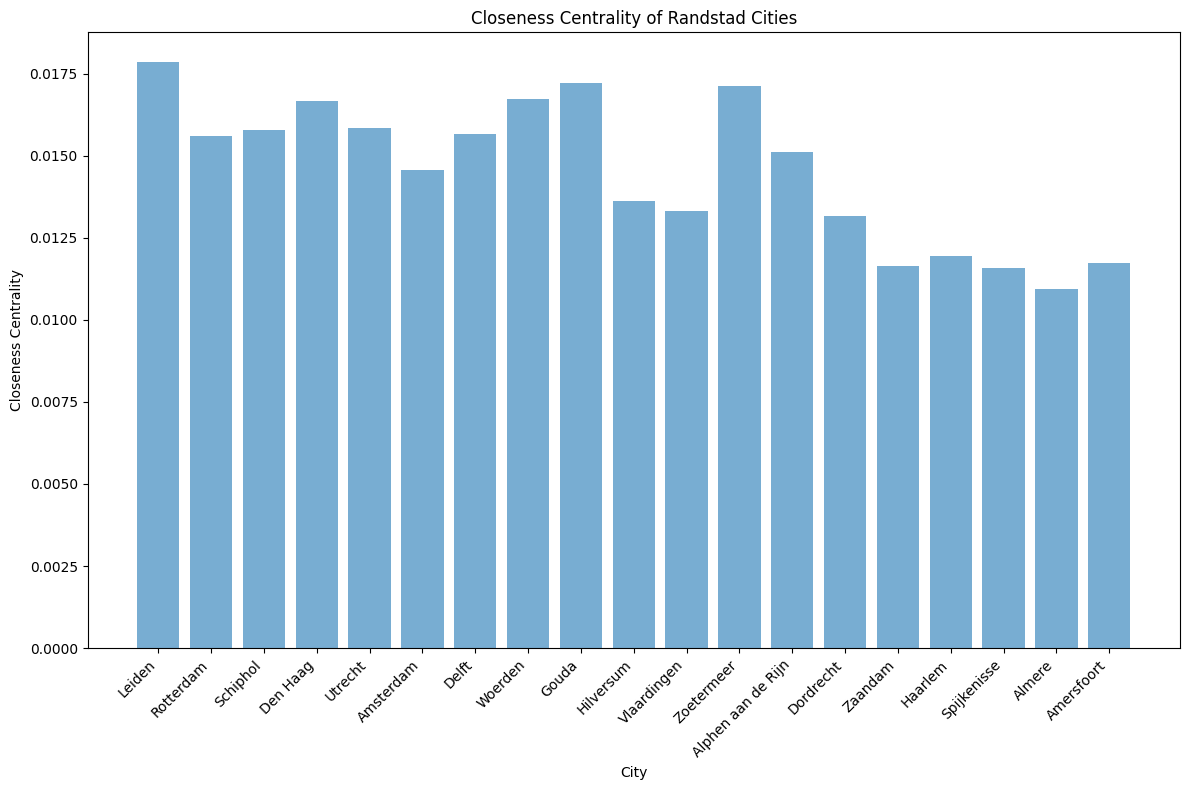

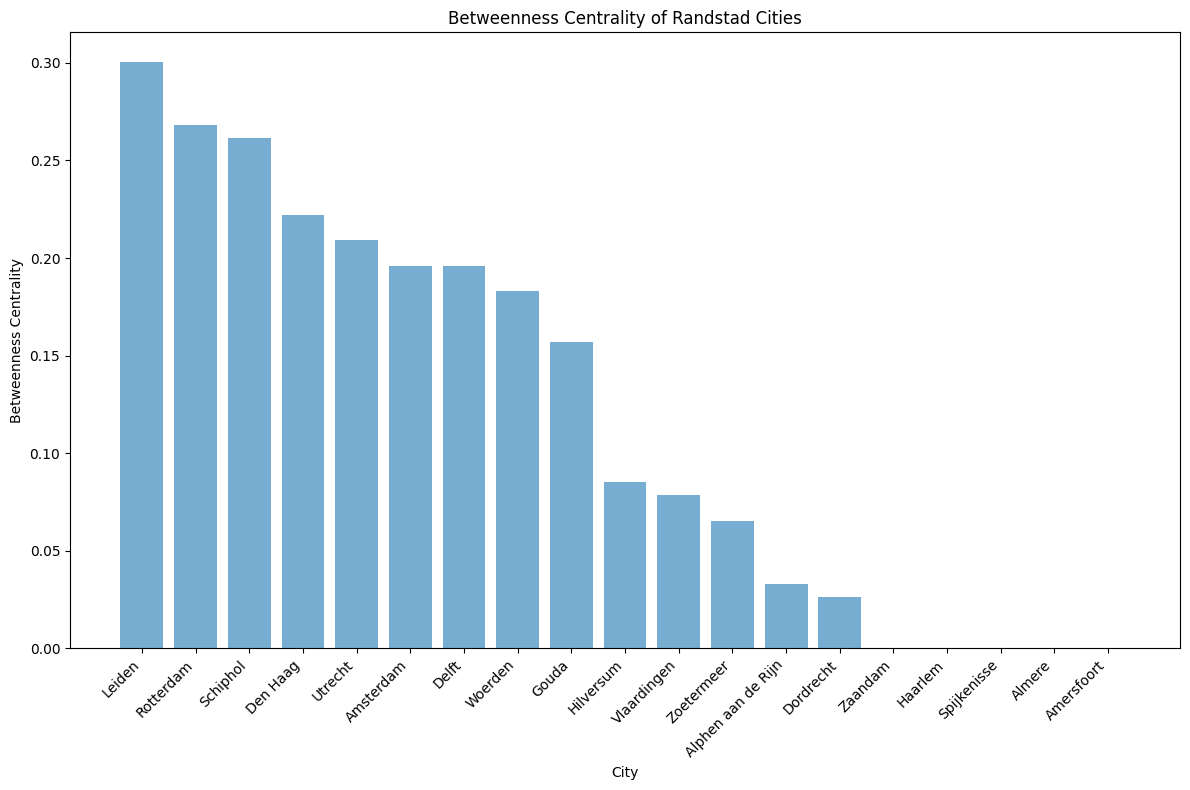

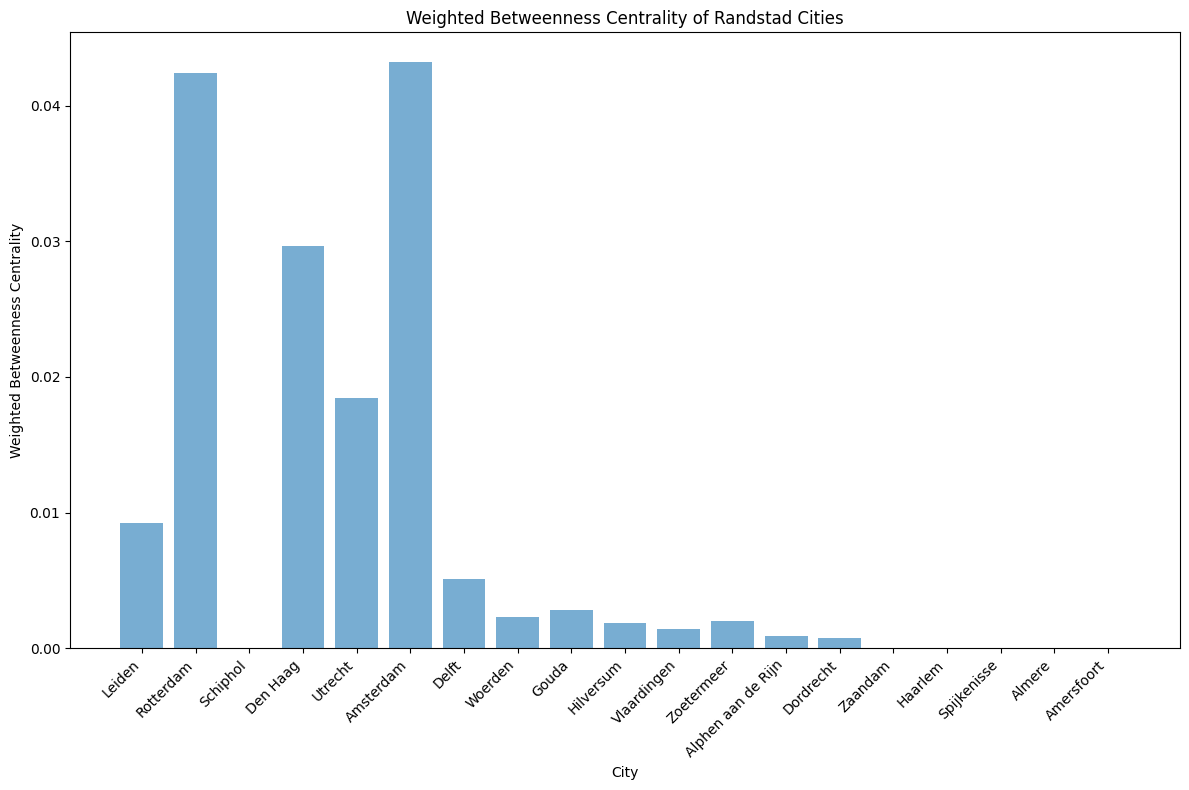

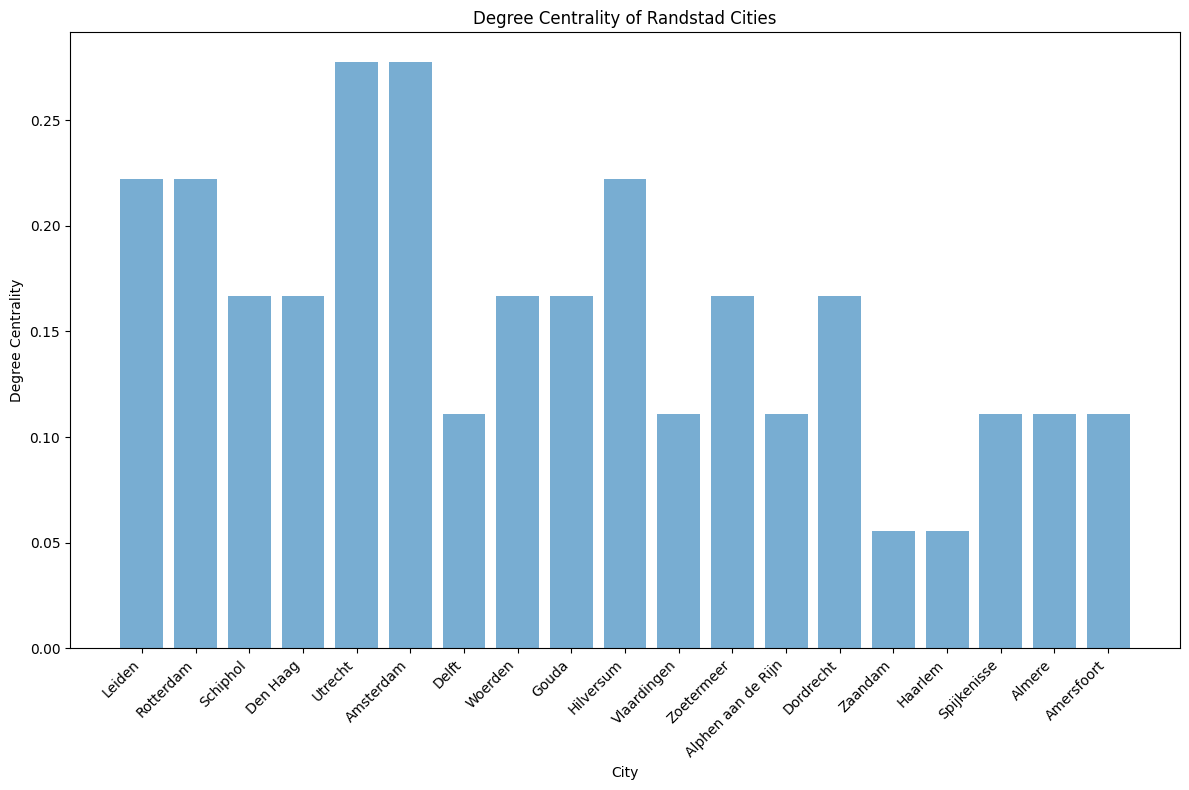

                  City  Closeness Centrality  Betweenness Centrality  \
0               Leiden              0.017861                0.300654   
1            Rotterdam              0.015601                0.267974   
2             Schiphol              0.015781                0.261438   
3             Den Haag              0.016673                0.222222   
4              Utrecht              0.015837                0.209150   
5            Amsterdam              0.014568                0.196078   
6                Delft              0.015670                0.196078   
7              Woerden              0.016710                0.183007   
8                Gouda              0.017225                0.156863   
9            Hilversum              0.013626                0.084967   
10         Vlaardingen              0.013316                0.078431   
11          Zoetermeer              0.017128                0.065359   
12  Alphen aan de Rijn              0.015106                0.03

In [13]:
# Calculate all the centralities and the sum of weighted paths
closeness_centrality = nx.closeness_centrality(G, distance='weight')
betweenness_centrality = nx.betweenness_centrality(G, normalized=True, weight='weight')
weighted_betweenness = {city: (cities_population[city] / total_population) * betweenness_centrality[city] for city in G.nodes}
degree_centrality = nx.degree_centrality(G)

# Since sorted_sum_weighted_paths is already calculated in your previous steps,
sorted_sum_weighted_paths = sorted(sum_weighted_paths.items(), key=lambda item: item[1], reverse=True)
# ensure it's in the correct format: a dictionary with city names as keys and the sum of weighted paths as values
# sorted_sum_weighted_paths = {...}

# Convert dictionaries to sorted lists for plotting
sorted_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True)
sorted_weighted_betweenness = sorted(weighted_betweenness.items(), key=lambda item: item[1], reverse=True)
sorted_degree = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
##sorted_sum_weighted_paths = sorted(sorted_sum_weighted_paths.items(), key=lambda item: item[1])

# Create DataFrame for all metrics for easier plotting and overview
metrics_df = pd.DataFrame({
    'City': [city for city, _ in sorted_betweenness],  # Order by betweenness for consistency
    'Closeness Centrality': [closeness_centrality[city] for city, _ in sorted_betweenness],
    'Betweenness Centrality': [betweenness_centrality[city] for city, _ in sorted_betweenness],
    'Weighted Betweenness Centrality': [weighted_betweenness[city] for city, _ in sorted_betweenness],
    'Degree Centrality': [degree_centrality[city] for city, _ in sorted_betweenness],
})

# Plotting all metrics
# Plotting all metrics
for metric in metrics_df.columns[1:]:  # Exclude 'City'
    plt.figure(figsize=(12, 8))
    plt.bar(metrics_df['City'], metrics_df[metric], alpha=0.6)
    plt.xlabel('City')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'{metric} of Randstad Cities')
    plt.tight_layout()
    plt.show()


# Display the DataFrame for an overview
print(metrics_df)

# Optionally, save the DataFrame to a CSV file
metrics_df.to_csv('randstad_cities_all_metrics.csv', index=False)